## Example 1 : Friedmann model and age of universe 

### Aims 
* recap basic programming structures in python
* plot a diagram with matplotlib
* solve an ordinary differential equation (ODE)
* create your own Friedmann models 
* compute the age of the universe for a given set of cosmological parameters 

### Tools
* basic python
* numpy matplotlib

### Solving an ODE
Newton's law of cooling describes how the temperature change in case of the presence of the temperature difference

$ \frac{{\rm d} T}{{\rm d} t} = r \cdot ( T_{\rm env} - T ) $, 

where $T_{\rm env}$ is a large reservoir with a constant temperature. We compute the temperature evolution with using the initial value $T(t=0)=T_0=500\,{\rm K}$ and $T_0 = 20\, {\rm K}$. We compute the evolution for a time interval $t \in [0,100]$ 

We use the Euler method to solve the equation: https://en.wikipedia.org/wiki/Euler_method

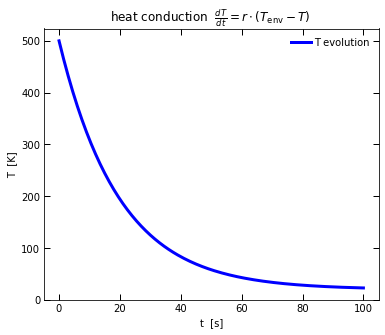

In [38]:
import matplotlib.pyplot as plt
# initail values and parameters 

t      =    0     # initial value for time, unit is here arbitray, could be second
t_max  =  100 
T      =  500     # initial value for temperature, T_0
dt     =    0.5   # time step  
# r = 0.05  # unit 1/time, note we use default values for arguments in dTdt_func

def dTdt_func( T, T_env=20, r=0.05) :
    dT_dt = r * ( T_env - T )
    return dT_dt

# the actual integration 
tL     = [t]      # initialize lists for plotting 
TL     = [T]
while t < t_max :
    dT_dt = dTdt_func( T, T_env, r )   # this is kind of 'velocity' of the change of the temperature 
    T  = T +  dT_dt * dt               # the actual change is 'velocity' * dt 
    t  = t + dt 
    TL.append(T)
    tL.append(t)
# plotting 
plt.figure( figsize=( 6,5))
plt.plot( tL, TL, '-', lw='3', c='blue', label='T evolution')
plt.xlabel( 't  [s]')
plt.ylabel( 'T  [K]')
plt.title(r'heat conduction  $\frac{dT}{dt} = r \cdot ( T_{\rm env} - T )$ ')
# plt.grid()
ax = plt.gca() 
ax.tick_params( axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True )
plt.legend()
plt.savefig('heat_conduction.pdf')

a more precise integration is using the midpoint method: https://en.wikipedia.org/wiki/Midpoint_method

Text(0, 0.5, 'T  [K]')

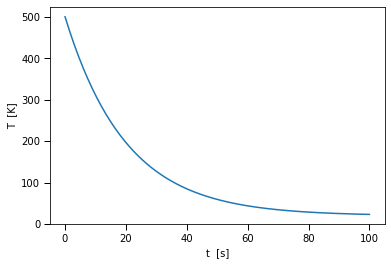

In [12]:
import matplotlib.pyplot as plt
# initail values and parameters 
r      =    0.05
T_env  =   20
t      =    0     # initial value for time
t_max  =  100 
T      =  500     # initial value for temperature, T_0
dt     =    0.5   # time step  

def dTdt_func( T, T_env=20, r=0.05) :
    dT_dt = r * ( T_env - T )
    return dT_dt


# the actual integration 
tL_LF    = [t]      # initialize lists for plotting 
TL_LF    = [T]
while t < t_max :
    dT_dt0 = dTdt_func( T, T_env, r )           # this is kind of 'velocity' of the change of the temperature
                                                #  at the beginning of the step 
    T_mid  = T +  dT_dt0 * 0.5*dt               # extrapolate to mid point 
    dT_dt_mid = dTdt_func( T_mid, T_env, r )    # compute the 'velocity' dTdt at the mid point 
    T  = T +  dT_dt_mid * dt                    # the actual change is middle 'velocity' * dt 
    t  = t + dt 
    TL_LF.append(T)
    tL_LF.append(t)
# plotting 
plt.plot( tL_LF, TL_LF, '-')
plt.xlabel( 't  [s]')
plt.ylabel( 'T  [K]')

We compare the divverence in the final tempature obtained with the two methods. Note, the step size has been the same for both methods

Text(0, 0.5, 'T  [K]')

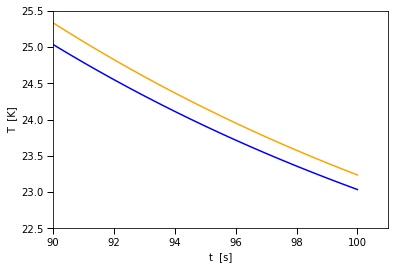

In [13]:
plt.plot( tL,     TL,      '-', color='blue' )
plt.plot( tL_LF,  TL_LF,   '-', color='orange' )
plt.xlim( 90, 101 )
plt.ylim( 22.5, 25.5  )
plt.xlabel( 't  [s]')
plt.ylabel( 'T  [K]')

## Excercise 1

Compute Friedmann models for a set of cosmological parameters using the expression for the time dependent Hubble constant

$ \quad H^2(a) = \left( \frac{\dot{a}}{a}\right)^2
        = H_0^2 \left\{ \Omega_{\rm r} \frac{1}{a^4} + \Omega_{\rm m} \frac{1}{a^3}  + \Omega_\Lambda + (1 - \Omega_{\rm m} - \Omega_\Lambda -  \Omega_{\rm r}) \frac{1}{a^2} \right\} $ 
        
see also: https://en.wikipedia.org/wiki/Friedmann_equations 
        
By taking the square root and multiplying by $a$ we obtain an expression for $ {\rm d} a / { {\rm d} t $. Note, we define as $H(a) = H_0 \sqrt{...} $, the Friedmann equation is actually solved by $H(a)$ and $-H(a)$:

$ \quad \frac{ {\rm d} a } { {\rm d} t } = \pm \, a \, H(a) $ 

Since the expression $H(a)$ diverges for $a=0$ we cannot start \from the beginning of the universe'. Instead, we solve backwards in time using as initial value 

$ \quad a(t_0) = 1 $,

where $t_0 = 0$ is the time today. We obtain the expansion parameter $a$ as function of lookback time (world models), see for comparison e.g.   

### Do the following:

$\bullet$ create you own Friedman universe (or several of it) for a given set of parameters $(H_0, \Omega_{\rm m}, \Omega_\Lambda)$ and plot it (them). For inspiration you may have a look at https://de.m.wikipedia.org/wiki/Datei:Mplwp_universe_scale_evolution.svg 


$\bullet$ Give the age of the universe, i.e. the total look back time, for your model(s). 

### More advanced optional tasks

$\bullet$ you may compare to analytic solutions: matter dominate universe $2 a^{3/2}(t) =  3 \sqrt{\Omega_{\rm m}} H_0 t$ with the special case of the Einstein de Sitter Universe $\Omega_{\rm m} = 1$, radiation dominated universe $a^2(t) = 2 \sqrt{\Omega_{\rm r}} H_0 t$, dark energy dominated univere $a(t) \propto \exp ( \sqrt{\Omega_{\Lambda}} H_0 t )$, see http://fma.if.usp.br/~mlima/AulaRaul2018/Scale-Factor.pdf

$\bullet$ Investigate what values for density parameters are needed to make the universe collapse again? Can a universe with vacuum energy collapse at all? 

$\bullet$  At which age of the universe the radiation energy density was equal to the matter energy density  ($\Omega_{\rm r} = 1.2 \cdot 10^{-5}$) ?  Note, you need a reasonably good $a(t)$ for the early evolution of the universe. (Changing the time step with $a$ might be useful here.) 

### How to compute a collapsing universe

$\bullet$ As indicated, the Friedmann equation above actually has always two solutions: a postive and a negative derivate $H(a)$. In a collapsing universe there is time $t_{\rm max}$ at which $a(t) = a_{\rm max}$ and ${\rm d} a / {\rm d} t = 0$. 

$\bullet$ To compute a collapsing universe we may start at a time $t < t_{\rm max}$ and $a(t) < a_{\rm max}$. From such a point in time we may compute backwards and forwards to obtain the evolution of the universe until $t_{\rm max}$.  At $t_{\rm max}$ the time dependend Hubble constant becomes zero, we may detect this by finding that the expression in the square root 'wants' to become negative. We prevent this from happening (a negative expression in the square root would be 'unphysical') by swittching to the negative solution ${\rm d} a / {\rm d} t  = - \, a \, H(a)$, i.e. $a$ is shrinking again (and keeps shrinking until the collapse). 


$\bullet$ More formally, we need to consider the acceleration equation

$\frac{\ddot{a}}{a} 
= 
- \frac{ 4 \pi G}{3} \left\{  \rho + \frac{ 3 p }{c^2} \right\} 
=
- \frac{1}{2} H_0 \left\{ \Omega_{\rm m} \frac{1}{a^3} ... \right\}
$

and should make sure that the change in $a$ also fulfills the curvature condition. This tells us if we should use the positive or negative solution for $H(a)$. 